# Exercise about lemonade (or whatever which sells).
* topics: Economics, demand curve, quadratic function, function interpolation in Python

## Task
* You decide to mix lemonade and sell it in front of your house.
* The question is how much money should you ask for it to maximize your profit?
* In economics, so called *demand curve* describes relation between price tag and demand for it.
* Let's consider first the most simplest form of demand curve which looks like this:

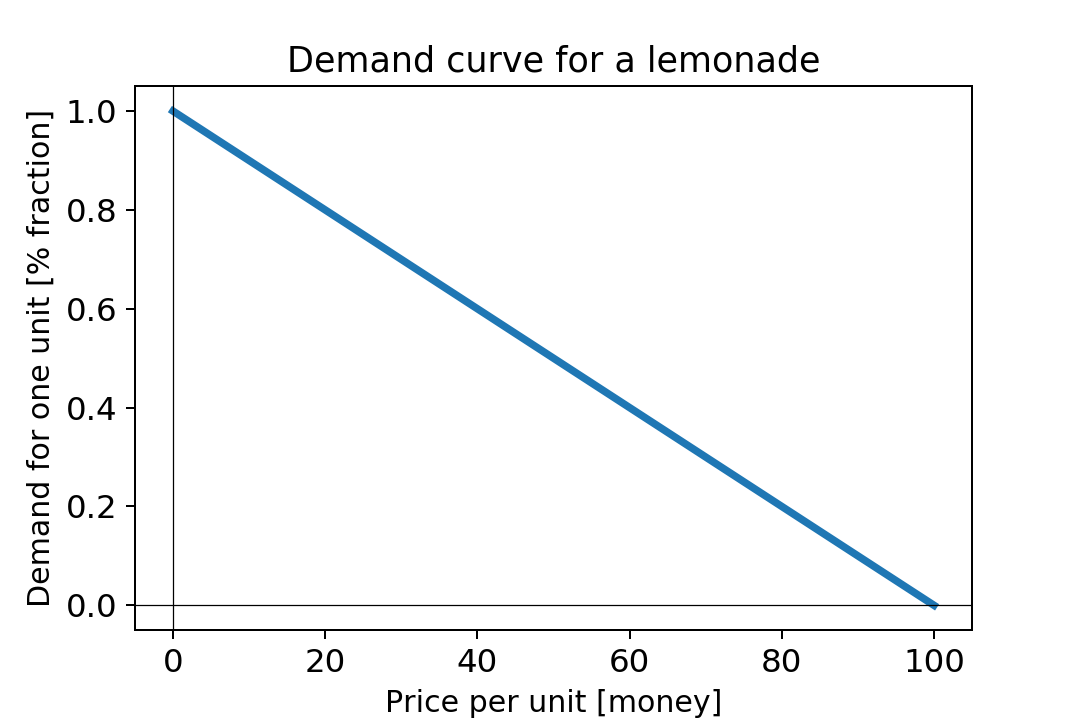

In [1]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/palec87/pymarad/main/resource/fig/demand_lim.png', retina=True)

* The meaning is, that by increasing price (moving right on the x axis) of the lemonade, less people will be willing to buy it. Demand is decreasing.
* At price of 100, nobody will buy your lemonade any more.
* On the other hand, for free (price=0), all the lemonades will be taken.
* Making lemonade is fairly cheap but not exactly for free, therefore making a single lemonade costs 10 money.
* And on top of that you have to make initial investment into the juicer for 1000 money.

## Questions
* How to optimally set your price in order to maximize your profit, let's say from 100 lemonades?
* When we consider real-life example of a demand curve from experiments on people, are we going to earn more or less money?

---
---
# In case this is your first Jupyter Notebook:
* Every cell is executed with `Shift-Enter`, once your cursor is in it.
* After successul run, a serial number of the execution will appear on the left from the cell
* For cell execution and creation of a new cell below, use `Alt-Enter`.
* Any text after a # symbol is a comment (to annotate your code) and it is ignored by Python
* Caution: If you execute a cell which has a hint in the output, the hint will disappear, therefore it is better to use `Alt-Enter`.
---
---

In [3]:
# import of classical modules as in the introduction
import numpy as np
import matplotlib.pyplot as plt

# advanced feature (fine to ignore), which enables to set parameters for ALL the plots in the notebook at once
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,6] # graph size
mpl.rcParams['lines.linewidth'] = 3  # line width
mpl.rcParams['lines.markersize'] = 10  # size of point markers
mpl.rcParams['xtick.labelsize'] = 12  # font size of x axis ticks
mpl.rcParams['ytick.labelsize'] = 12 # font size of y axis ticks
mpl.rcParams['axes.labelsize'] = 'larger'  # font size of the axes labels

# uncomment the command below to find out all possible parameters of graph you can change/set.
# mpl.rcParams.keys()  

In [21]:
# define axis (values) of lemonade price.
price = 

In [22]:
# First we need to find the equation of the displayed demand (in a form demand = a*price + b)
# for calculating the parameters a and b, the easiest is to use two points
# intersecting the x (price=0) and y (demand=0) axis
a = 
b = 

* Note that this is for a single lemonade, and we will imagine that for a small business with more that 8 billion potential customers, we simply multiply our demand by number of lemonades we produce.
* In other words, we can not saturate the market like for example coca-cola.

In [23]:
# In total our demand for 100 lemonades equals:
demand = 

### Demand therefore tells us how big fraction of lemonades we are able to sell at certain given price.

In [6]:
# What is then your total income from 100 lemonades?
income = 

In [7]:
# And what are your expanses?
investment = 
production = 
total_expanse = 

In [8]:
# Finally, what is your net profit
profit = 

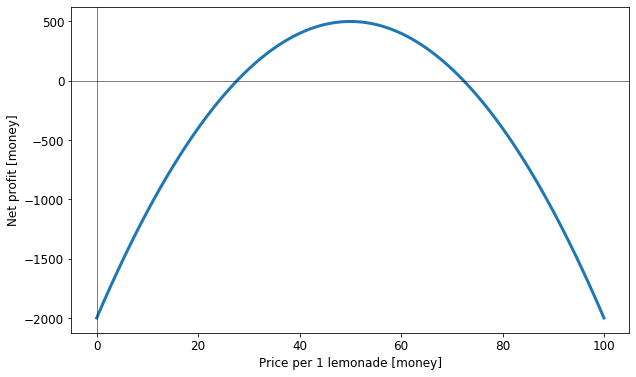

In [19]:
# Let's plot the profit curve:

plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.xlabel('Price per 1 lemonade [money]')
plt.ylabel('Net profit [money]')
plt.show()

---
* This makes sense. For price=0, all the lemonades will be taken and we lose investment of 1000, plus production cost of 100 x 10. Altogether -2000
* At maximum price of 100, it looks similar, only with the advantage, that we will have all the 100 lemonades at home to drink :)
---

### Just from the symmetry of the parabola, we can see that maximum profit occurs exactly between 0 and 100, hence price=50

In [10]:
# How many lemonades are we going to sell?
# Leftover lemonades is calculated as 1-demand
1-(a*50 + b)

0.5

We achieve maximum gain when we sell only half of our produce. That might be little surprising but it all depends on the shape of the demand curve.

## How to find the solution in general?
* We can proceed in a similar way as in the pizza exercise, create a function and use a python function analogous to `fsolve()`, just not for finding roots of equations but extremes (minimum or maximum)
* That function is `minimize()` from the same module `scipy.optimize`.
* However, our function needs many inputs, because profit depends on: (price, investment, production, produced amount)

We are going to chose alternative, not optimal but quick and easy way. We are going to look for maximum of our profit array.

In [11]:
# That is even possible to do by eye if we display our profit values


array([-2000., -1901., -1804., -1709., -1616., -1525., -1436., -1349.,
       -1264., -1181., -1100., -1021.,  -944.,  -869.,  -796.,  -725.,
        -656.,  -589.,  -524.,  -461.,  -400.,  -341.,  -284.,  -229.,
        -176.,  -125.,   -76.,   -29.,    16.,    59.,   100.,   139.,
         176.,   211.,   244.,   275.,   304.,   331.,   356.,   379.,
         400.,   419.,   436.,   451.,   464.,   475.,   484.,   491.,
         496.,   499.,   500.,   499.,   496.,   491.,   484.,   475.,
         464.,   451.,   436.,   419.,   400.,   379.,   356.,   331.,
         304.,   275.,   244.,   211.,   176.,   139.,   100.,    59.,
          16.,   -29.,   -76.,  -125.,  -176.,  -229.,  -284.,  -341.,
        -400.,  -461.,  -524.,  -589.,  -656.,  -725.,  -796.,  -869.,
        -944., -1021., -1100., -1181., -1264., -1349., -1436., -1525.,
       -1616., -1709., -1804., -1901., -2000.])

In [12]:
# In Python we have function max()


500.0

In [13]:
# This is maximum profit, to get a price (value on x axis), we must use
# np.argmax()


50

!!! CAREFUL!!!
---
This result looks good, BUT
* `np.argmax()` return position (index) of our x axis, at which our maximum value of 500 appears

In [14]:
# Therefore we have to find a value from our *price* array at index 50


50.0

In [15]:
# We can merge both operation into:


50.0

## `np.argmax(profit)` gives correct result only because we created initial array of 101 points between 0 and 100
* therefore position 50 has value of 50.
* with most other *price* arrays, `np.argmax()` would give wrong result.

In [16]:
# for the intruiged
type(np.argmax(price))  # this is 'int', integer type

numpy.int64

In [17]:
type(price[50])  # this is 'float', so how real number are represented

numpy.float64

!!! CAREFUL 2!!!
---
* `minimize()` from `scipy.optimize` is better method, because the solution is numerically exact.
* Yes, `minimize()` is used even for identifying function's maximum, the trick is to minimize function -profit.
* Using `max()`, we just searched values of our created array from the initial setup.
* Therefore, precision of `max()` depends on the frequency of our x values, on the so called *sampling*.

---
---
* Every business crave the knowledge of demand curve, because it optimizes money making out of any kind of product.
* In practice, many types of surveys, revealed preferences based on your past spendings, even auctions serve the purpuse of measuring so called willingness to pay (WTP), which is basically the demand curve.

### One concrete example is when [Lusk and Schroeder managed to measure demand for american steaks in 2004](https://onlinelibrary.wiley.com/doi/full/10.1111/j.0092-5853.2004.00592.x)


* They actually did 2 things:
* Asking the same set of questions about steak preferences, one group had to purchase (really pay) their favourite steak, unlike the other group, which were not bound to spend any money.
* This setting captures the fact, that people easily say they would pay for something, than actually pay in the end of the experiment.
* We name the group which does not have to purchase any stake *_hyp* (hypothetical)
* And the one which has to buy their favourite steak in the end *_non_hyp* (non-hypothetical)

### I digitized their published curves for you here.

In [4]:
# Publication has only few points
x = np.array([1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1])*100

# y axis
data_hyp = np.array([1, 0.91, 0.63, 0.26, 0.1, 0.05, 0])
data_non_hyp = np.array([0.9, 0.68, 0.4, 0.17, 0.08, 0.04, 0])

In [9]:
# I interpolate the values inbetween the original given values.
# some details on the method are here, https://numpy.org/doc/stable/reference/generated/numpy.interp.html
# however, that is an advanced topic for other exercise
from scipy import interpolate

# In short, we deduce values on the demand curve in between the given points.
# Points I want to get interpolated values for are:
price_new = np.linspace(1/7*100, 100, 201)

# interpolation of the y axis values for the two groups
f_hyp = interpolate.interp1d(data_x, data_hyp, kind='cubic')
f_non_hyp = interpolate.interp1d(data_x, data_non_hyp, kind='cubic')

# we get the new demand by applying f_ on our new x axis, price_new
demand_hyp = f_hyp(price_new)
demand_non_hyp = f_non_hyp(price_new)

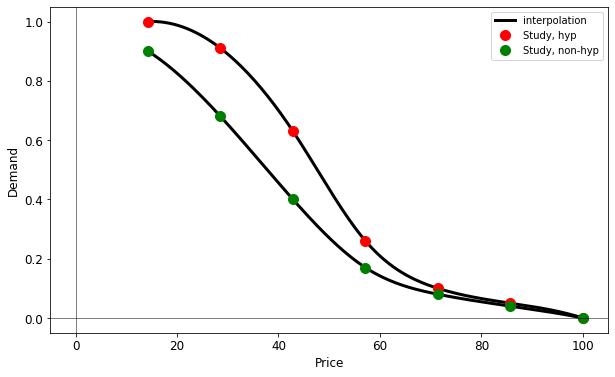

In [12]:
# Plot graph of values from the study (data_x, data_hyp) and
# the data which I interpolated (price_new, demand_new)

plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend()
plt.show()

### That seems to work, and also makes sense:
* At low prices, the demand flattens, because everyone who is in steak mood will buy it at such a good bargain.
* Also, there are always people, which do not need to care about the steak price, and will buy it whenever they feel like having one, therefore the slow drop to zero demand at high prices.
* Finally note, that hypothetical demand is lower at any price than the non-hypothetical one. People are less positive towards steaks, when they really need to buy it in the end.

---

## Question: If we apply these demand curves for our lemonade, are we going to earn more or less than before?
* The procedure will be the same, we only need to use new x axis *price_new*
* Technically our demand does not contain the *price_new* explicitly, so it is not quadratic function any more
* In reality it is not any known function, hence impossible to solve on paper.
* But no problem for Python which we will use exactly the same way as before.

In [13]:
# demand_new for 100 lemonades
demand_hyp_100 = 
demand_non_hyp_100 =

In [14]:
# profit calculation is the same
income_hyp = 
income_non_hyp = 

In [15]:
# Expanses are exactly the same, so no need to recalculate them


In [16]:
# profit
profit_hyp = 
profit_non_hyp = 

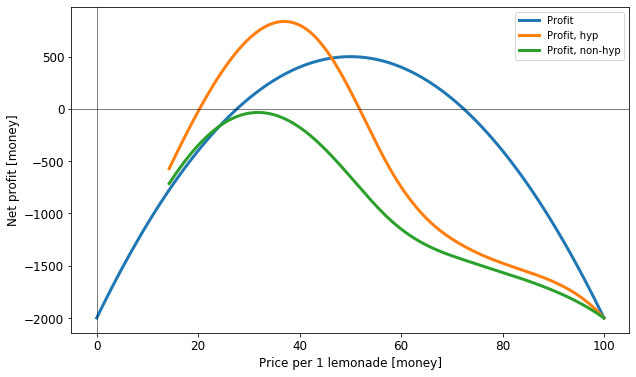

In [18]:
# We plot original profit with the new one

plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.xlabel('Price per 1 lemonade [money]')
plt.ylabel('Net profit [money]')
plt.legend()
plt.show()

## Our profit curve is not a qaudratic function any more
* However, we can still find limonade prices which lead to maximum possible profits.

In [3]:
# print statement to find out what is our profit and at what price
# hyp group
print(f'Hypothetical maximum profit is {round(np.max(profit_hyp))} \
if 1 lemonade price is {price_new[np.argmax(profit_hyp)]}')

In [4]:
# non_hyp group
print(f'Non-hypothetical maximum profit is {round(np.max(profit_non_hyp))} \
if 1 lemonade price is {price_new[np.argmax(profit_non_hyp)]}')

# The most important message here is:
* Asking people about *willingness* of spending money and their *actual spendings* are two different things.
* And this can be the difference between flourishing and bankrupt business.

---
---

## Food for thought:
1. Can you modify notebook and use `minimize()` function from module `scipy.optimize` to find the maximum profit for the theoretical linearly decreasing demand?

---

# Good job!!!